# Maybank2u SG (Lite) Review Analysis (Google Play & App Store)

## Loading Required Packages

The first step involves importing the necessary Python packages. Ensure you have these installed in your environment.

In [64]:
!pip install pandas google-play-scraper app-store-scraper seaborn matplotlib wordcloud requests==2.24.0 urllib3==1.26.5


# import packages
import pandas as pd
from google_play_scraper import app, reviews
from app_store_scraper import AppStore
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import warnings

# To see full review in each row, uncomment this line below
#pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

Python(75792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached requests-2.24.0-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached urllib3-1.26.5-py2.py3-none-any.whl.metadata (43 kB)
INFO: pip is looking at multiple versions of requests to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install requests==2.24.0 and urllib3==1.26.5 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested urllib3==1.26.5
    requests 2.24.0 depends on urllib3!=1.25.0, !=1.25.1, <1.26 and >=1.21.1

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Scraping Google Play Data

Modify the count variable to change the number of reviews fetched from the Google Play Store.

In [65]:
# Initial count of reviews to fetch
count = 200

# Initialize rows and cols
rows, cols = 0, 0

# Loop to fetch reviews until the DataFrame is not empty or count reaches 0
while rows == 0 and count > 0:
    result, continuation_token = reviews(
        'sg.maybank.mae',
        lang='en',
        country='us',
        count=count
    )
    
    mb_ggplay_df = pd.DataFrame(result)
    rows, cols = mb_ggplay_df.shape
    
    if rows == 0:
        count -= 1

print(f"Number of reviews fetched: {rows}")

# Optionally drop columns if needed
if rows > 0:
    mb_ggplay_df = mb_ggplay_df.drop(['reviewId', 'userImage'], axis=1)
else:
    print("Failed to fetch reviews")
    
mb_ggplay_df.head()

Number of reviews fetched: 198


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bambam 81,Change my phone and need to re log in to the a...,1,0,5.8,2024-07-30 03:26:02,None,None,5.8
1,chaangru lee,I had to click more than 10 times to perform a...,1,0,None,2024-07-29 07:40:30,None,None,None
2,Valerie Soh,Bad app. I cannot log in at all and poor setti...,1,0,5.8,2024-07-25 21:25:35,None,None,5.8
3,Adilla,Everything is just bad!,1,0,5.8,2024-07-14 03:18:43,None,None,5.8
4,Hassan Ibrahim,Easy n faster for transfer,5,1,5.8,2024-07-13 20:18:53,None,None,5.8


## Scraping App Store Data

Similarly, adjust the count variable to change the number of reviews fetched from the Apple App Store.

In [66]:
count = 49 # number of reviews to fetch

mb_appstore = AppStore(country="sg", app_name="Maybank2u SG (Lite)")
mb_appstore.review(how_many=count)
mb_appstore_df = pd.DataFrame(mb_appstore.reviews)
rows, cols = mb_appstore_df.shape
print(f"Number of reviews fetched: {rows}")
mb_appstore_df.head()

2024-07-31 09:38:48,135 [INFO] Base - Searching for app id
2024-07-31 09:38:49,731 [INFO] Base - Initialised: AppStore('sg', 'maybank2u-sg-lite-', 1574139300)
2024-07-31 09:38:49,732 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/maybank2u-sg-lite-/id1574139300
2024-07-31 09:38:51,034 [INFO] Base - [id:1574139300] Fetched 50 reviews (50 fetched in total)


Number of reviews fetched: 50


,date,review,rating,isEdited,userName,title
0,2024-04-13 15:56:53,I do not want this APP to be able to access my...,2,False,aezjnn,Do not allow access to Contacts
1,2023-12-17 01:55:36,Why makes things complicating when the usage o...,1,False,jajz5678,Bad set up and UX
2,2022-01-20 13:26:50,Finally a new mobile banking app is out to tak...,5,False,Jttc14,Something new and something better for the new...
3,2024-03-04 11:30:38,Why does payment limit always at a max of 1000...,2,False,superkaly,Lousy app and settings
4,2024-07-29 03:16:46,Pls include a “Scheduled Transfer” feature in ...,2,False,Agape20,Scheduled Transfer feature


## Full data

This section combines the reviews from both platforms into a single DataFrame.

In [67]:
# Combine them together:
mb_ggplay_df['platform'] = 'Google Play'
mb_appstore_df['platform'] = 'App Store'
mb_appstore_df['content'] = mb_appstore_df['title'] + ' , ' + mb_appstore_df['review']
mb_appstore_df = mb_appstore_df.rename(columns = {'date':'at','rating':'score'})
mb_appstore_df = mb_appstore_df[['at','score','userName','platform','content']]
mb_df = pd.concat([mb_ggplay_df, mb_appstore_df], axis=0, ignore_index=True)
mb_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,platform
0,bambam 81,Change my phone and need to re log in to the a...,1,0.0,5.8,2024-07-30 03:26:02,None,None,5.8,Google Play
1,chaangru lee,I had to click more than 10 times to perform a...,1,0.0,None,2024-07-29 07:40:30,None,None,None,Google Play
2,Valerie Soh,Bad app. I cannot log in at all and poor setti...,1,0.0,5.8,2024-07-25 21:25:35,None,None,5.8,Google Play
3,Adilla,Everything is just bad!,1,0.0,5.8,2024-07-14 03:18:43,None,None,5.8,Google Play
4,Hassan Ibrahim,Easy n faster for transfer,5,1.0,5.8,2024-07-13 20:18:53,None,None,5.8,Google Play


## Only Google Play data

In [68]:
mb_ggplay_df = mb_df[mb_df['platform'] == 'Google Play']
mb_ggplay_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,platform
0,bambam 81,Change my phone and need to re log in to the a...,1,0.0,5.8,2024-07-30 03:26:02,None,None,5.8,Google Play
1,chaangru lee,I had to click more than 10 times to perform a...,1,0.0,None,2024-07-29 07:40:30,None,None,None,Google Play
2,Valerie Soh,Bad app. I cannot log in at all and poor setti...,1,0.0,5.8,2024-07-25 21:25:35,None,None,5.8,Google Play
3,Adilla,Everything is just bad!,1,0.0,5.8,2024-07-14 03:18:43,None,None,5.8,Google Play
4,Hassan Ibrahim,Easy n faster for transfer,5,1.0,5.8,2024-07-13 20:18:53,None,None,5.8,Google Play


## Only App Store data

In [69]:
mb_appstore_df = mb_df[mb_df['platform'] == 'App Store']
mb_appstore_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,platform
198,aezjnn,"Do not allow access to Contacts , I do not wan...",2,NaN,NaN,2024-04-13 15:56:53,NaN,NaN,NaN,App Store
199,jajz5678,"Bad set up and UX , Why makes things complicat...",1,NaN,NaN,2023-12-17 01:55:36,NaN,NaN,NaN,App Store
200,Jttc14,Something new and something better for the new...,5,NaN,NaN,2022-01-20 13:26:50,NaN,NaN,NaN,App Store
201,superkaly,"Lousy app and settings , Why does payment limi...",2,NaN,NaN,2024-03-04 11:30:38,NaN,NaN,NaN,App Store
202,Agape20,"Scheduled Transfer feature , Pls include a “Sc...",2,NaN,NaN,2024-07-29 03:16:46,NaN,NaN,NaN,App Store


## Bar graph for rating score (2022-2024)

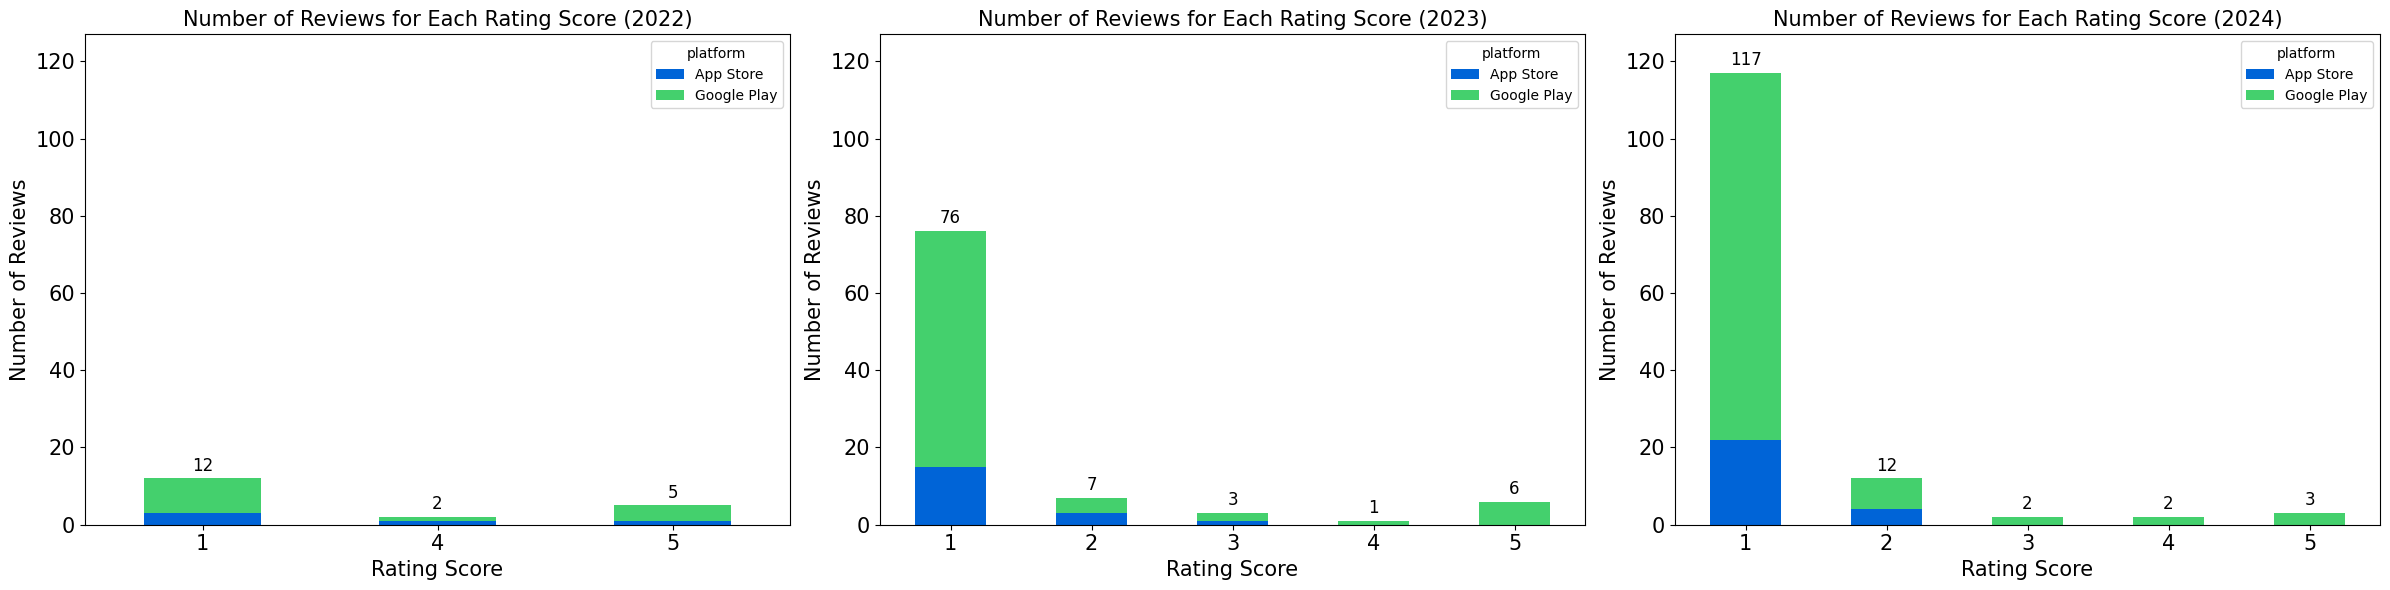

In [70]:
# Bar graphs for the number of reviews in the years 2022, 2023, and 2024


# Filter the DataFrame for the years 2022, 2023, and 2024
mb_2022 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2022], mb_appstore_df[mb_appstore_df['at'].dt.year == 2022]], axis=0, ignore_index=True)
mb_2023 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2023], mb_appstore_df[mb_appstore_df['at'].dt.year == 2023]], axis=0, ignore_index=True)
mb_2024 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2024], mb_appstore_df[mb_appstore_df['at'].dt.year == 2024]], axis=0, ignore_index=True)

# Get the value counts for each score and platform for all three years
value_counts_2022 = mb_2022.groupby(['score', 'platform']).size().unstack(fill_value=0)
value_counts_2023 = mb_2023.groupby(['score', 'platform']).size().unstack(fill_value=0)
value_counts_2024 = mb_2024.groupby(['score', 'platform']).size().unstack(fill_value=0)

# Determine the maximum y-value to set the same y-axis limit
max_y = max(value_counts_2022.sum(axis=1).max(), value_counts_2023.sum(axis=1).max(), value_counts_2024.sum(axis=1).max()) + 5

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Define colors for platforms
colors = ['#0064D7', '#44D06D']

# Plot for 2022
value_counts_2022.plot(kind='bar', stacked=True, color=colors, ax=axs[0])
axs[0].set_title('Number of Reviews for Each Rating Score (2022)', fontsize=15)
axs[0].set_xlabel('Rating Score', fontsize=15)
axs[0].set_ylabel('Number of Reviews', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='x', rotation=0)  # Rotate x-axis labels to vertical
axs[0].set_ylim(0, max_y + 5)  # Set the same y-axis limit for all plots

# Adding total labels on top of each stacked bar for 2022
totals_2022 = value_counts_2022.sum(axis=1)
for i, total in enumerate(totals_2022):
    axs[0].text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

# Plot for 2023
value_counts_2023.plot(kind='bar', stacked=True, color=colors, ax=axs[1])
axs[1].set_title('Number of Reviews for Each Rating Score (2023)', fontsize=15)
axs[1].set_xlabel('Rating Score', fontsize=15)
axs[1].set_ylabel('Number of Reviews', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='x', rotation=0) 
axs[1].set_ylim(0, max_y + 5)  # Set the same y-axis limit for all plots

# Adding total labels on top of each stacked bar for 2023
totals_2023 = value_counts_2023.sum(axis=1)
for i, total in enumerate(totals_2023):
    axs[1].text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

# Plot for 2024
value_counts_2024.plot(kind='bar', stacked=True, color=colors, ax=axs[2])
axs[2].set_title('Number of Reviews for Each Rating Score (2024)', fontsize=15)
axs[2].set_xlabel('Rating Score', fontsize=15)
axs[2].set_ylabel('Number of Reviews', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].tick_params(axis='x', rotation=0) 
axs[2].set_ylim(0, max_y + 5)  # Set the same y-axis limit for all plots

# Adding total labels on top of each stacked bar for 2024
totals_2024 = value_counts_2024.sum(axis=1)
for i, total in enumerate(totals_2024):
    axs[2].text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Bar graph for rating score (2024)

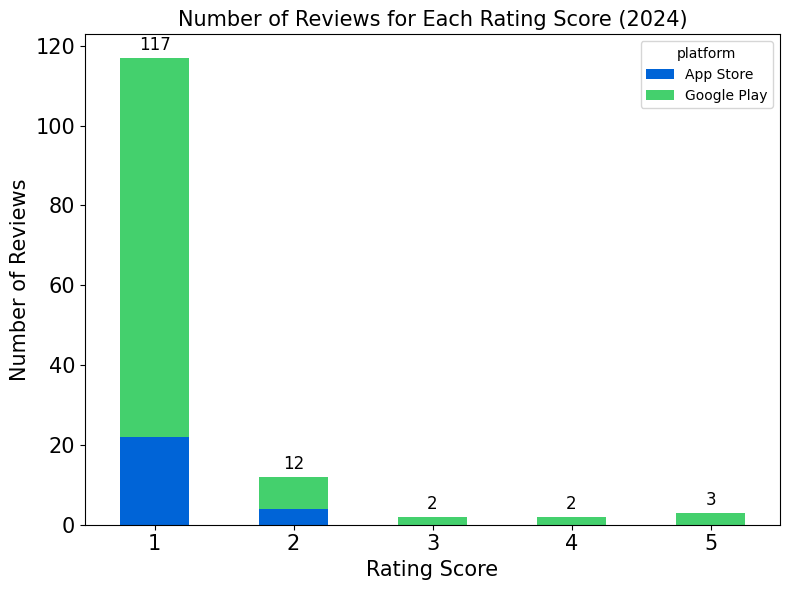

In [71]:
# Filter the DataFrame for the year 2024
mb_2024 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2024], mb_appstore_df[mb_appstore_df['at'].dt.year == 2024]], axis=0, ignore_index=True)

# Get the value counts for each score and platform for 2024
value_counts_2024 = mb_2024.groupby(['score', 'platform']).size().unstack(fill_value=0)

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for platforms
colors = ['#0064D7', '#44D06D']

# Plot for 2024
value_counts_2024.plot(kind='bar', stacked=True, color=colors, ax=ax)
ax.set_title('Number of Reviews for Each Rating Score (2024)', fontsize=15)
ax.set_xlabel('Rating Score', fontsize=15)
ax.set_ylabel('Number of Reviews', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='x', rotation=0) 

# Adding total labels on top of each stacked bar for 2024
totals_2024 = value_counts_2024.sum(axis=1)
for i, total in enumerate(totals_2024):
    ax.text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Heatmap of Scores by Quarter (Google Play)

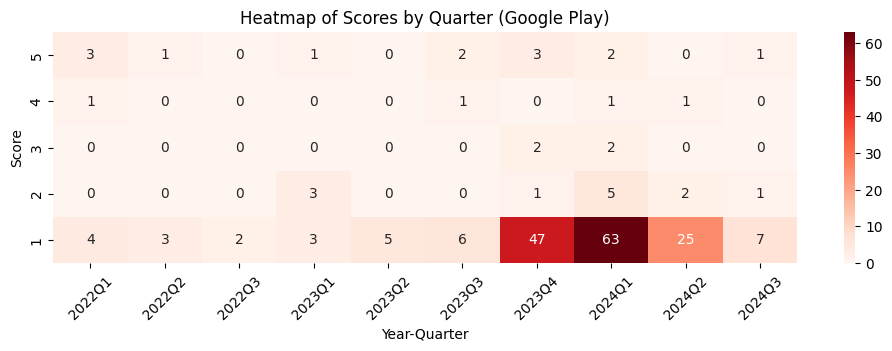

In [72]:
# Number of reviews for each score in each quarter

mb_ggplay_df['at'] = pd.to_datetime(mb_ggplay_df['at'])

# Create a year-quarter column
mb_ggplay_df['year_quarter'] = mb_ggplay_df['at'].dt.to_period('Q')

# Aggregate data to create a pivot table
review_quarter = mb_ggplay_df.pivot_table(index='score', columns='year_quarter', aggfunc='size', fill_value=0)

# Visualising the number of reviews for each score in each quarter

plt.figure(figsize=(12, 3))
ax = sns.heatmap(review_quarter, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Scores by Quarter (Google Play)')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Reverse the y-axis
ax.invert_yaxis()

plt.show()

## Heatmap of Scores by Quarter (App Store)

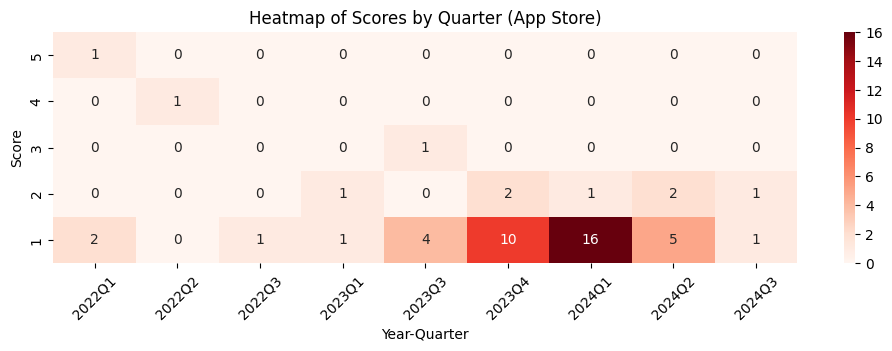

In [73]:
# Number of reviews for each score in each quarter

mb_appstore_df['at'] = pd.to_datetime(mb_appstore_df['at'])

# Create a year-quarter column
mb_appstore_df['year_quarter'] = mb_appstore_df['at'].dt.to_period('Q')

# Aggregate data to create a pivot table
review_quarter = mb_appstore_df.pivot_table(index='score', columns='year_quarter', aggfunc='size', fill_value=0)

# Visualising the number of reviews for each score in each quarter

plt.figure(figsize=(12, 3))
ax = sns.heatmap(review_quarter, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Scores by Quarter (App Store)')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Reverse the y-axis
ax.invert_yaxis()

plt.show()

## Heatmap of Scores by App Version (Google Play)

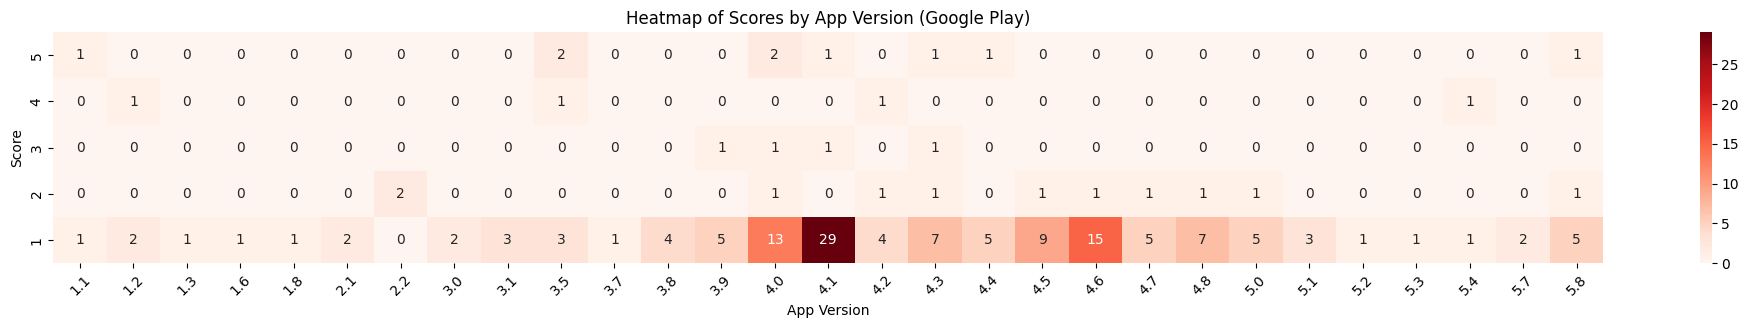

In [74]:
# Number of reviews for each score for each version

review_version = mb_ggplay_df.pivot_table(index='score', columns='appVersion', aggfunc='size', fill_value=0)

# Visualising the number of reviews for each score for each version

plt.figure(figsize=(25, 3))
ax = sns.heatmap(review_version, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Scores by App Version (Google Play)')
plt.xlabel('App Version')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Reverse the y-axis
ax.invert_yaxis()

plt.show()

In [75]:
# Data for scores by app version on appstore is not available

## Word Cloud for Reviews with Low Ratings (Google Play)

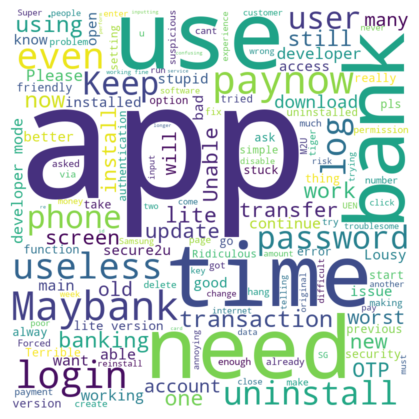

In [76]:
# Modify the scores_to_search to generate the Word Cloud for reviews with those scores

scores_to_search = [1,2,3]

# Visualising the most frequent words appeared in the reviews with score <=3

text_ggplay = " ".join(review for review in mb_ggplay_df[mb_ggplay_df["score"].isin(scores_to_search)]["content"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      max_words=150).generate(text_ggplay)

# Display the generated image:
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Frequently Appeared Words (Google Play)

In [77]:
# Tokenize the text
words = re.findall(r'\b\w+\b', text_ggplay.lower())

# Count frequency of each word
word_counts = Counter(words)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the word frequencies
print(word_freq_df[word_freq_df["Word"].str.len()>4].head(15))

          Word  Frequency
401    maybank         25
43      paynow         24
52      cannot         24
74       login         21
11       after         21
69     useless         20
24       other         18
344  uninstall         17
15    password         16
2        phone         16
59       using         14
143  developer         14
16       still         13
126    banking         13
262    version         13


## Filter to fetch reviews contain specific word and rating (Google Play)

In [78]:
# Modify the word_to_search and scores_to_search to fetch reviews containing the specific word and score

word_to_search = "time"
scores_to_search = [1,2,3]

mb_ggplay_df[(mb_ggplay_df["score"].isin(scores_to_search))&(mb_ggplay_df["content"].str.contains(word_to_search,case=False))][['content','score','appVersion','at','platform']]

,content,score,appVersion,at,platform
1,I had to click more than 10 times to perform a...,1,None,2024-07-29 07:40:30,Google Play
20,Crush so many times,1,5.0,2024-05-23 00:36:55,Google Play
23,"Many problems, not friendly user & take a long...",1,5.0,2024-05-22 12:51:10,Google Play
32,Super useless... Doesnt even launch after repe...,1,4.8,2024-04-26 22:57:25,Google Play
34,Lousy app....most of the time login with pin v...,1,4.7,2024-04-08 12:36:27,Google Play
50,App is soo slow. By the time transaction done ...,1,4.6,2024-03-06 13:22:13,Google Play
53,Useless app after latest update. Don't update ...,1,4.6,2024-03-04 18:03:08,Google Play
55,Just switch to lite. Can't get the screen to e...,1,4.6,2024-03-02 12:17:41,Google Play
64,Hopeless & disappointing app. Transfer of fund...,1,4.5,2024-02-28 02:29:16,Google Play
71,I working as a cleaner for low income so I bor...,1,4.4,2024-02-23 00:03:21,Google Play


## Word Cloud for Reviews with Low Ratings (App Store)

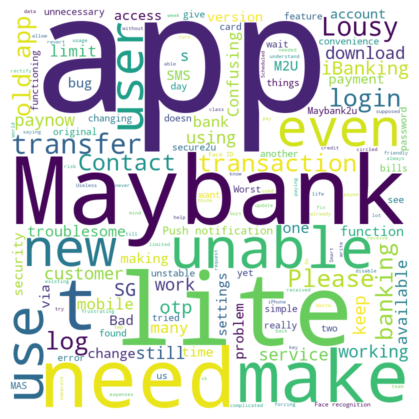

In [79]:
# Modify the scores_to_search to generate the Word Cloud for reviews with those scores

scores_to_search = [1,2,3]

# Visualising the most frequent words appeared in the reviews with score <=3

text_appstore = " ".join(review for review in mb_appstore_df[mb_appstore_df["score"].isin(scores_to_search)]["content"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      max_words=150).generate(text_appstore)

# Display the generated image:
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Frequently Appeared Words (App Store)¶

In [80]:
# Tokenize the text
words = re.findall(r'\b\w+\b', text_appstore.lower())

# Count frequency of each word
word_counts = Counter(words)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the word frequencies
print(word_freq_df[word_freq_df["Word"].str.len()>4].head(15))

         Word  Frequency
144   maybank         17
107    unable         13
87   transfer          9
36     cannot          9
95      lousy          8
188    please          8
90      after          7
211  ibanking          7
53    banking          7
268     login          7
123     still          6
112    paynow          6
385   working          6
19      there          6
57      using          6


## Filter to fetch reviews contain specific word and rating (App Store)

In [81]:
# Modify the word_to_search and scores_to_search to fetch reviews containing the specific word and score

word_to_search = ""
scores_to_search = [1,2,3,4,5]

mb_appstore_df[(mb_appstore_df["score"].isin(scores_to_search))&(mb_appstore_df["content"].str.contains(word_to_search,case=False))][['content','score','appVersion','at','platform']].sort_values('at', ascending=False)

,content,score,appVersion,at,platform
202,"Scheduled Transfer feature , Pls include a “Sc...",2,NaN,2024-07-29 03:16:46,App Store
236,"How many app? , How many apps do Maybank needs...",1,NaN,2024-07-08 09:12:42,App Store
209,"Too lite , This lite version app is too functi...",2,NaN,2024-06-19 13:57:57,App Store
203,"Confusing and misleading , There are two versi...",1,NaN,2024-05-29 15:51:26,App Store
210,"Worst banking app , Why need OTP after Face ID...",1,NaN,2024-05-25 00:34:44,App Store
216,"Use this app at your own risk , Lousy app as e...",1,NaN,2024-05-09 11:13:03,App Store
213,"Lousy app , Unable to view my transaction hist...",1,NaN,2024-05-04 15:28:41,App Store
240,"No section to write notes , Smart nation, not ...",1,NaN,2024-05-03 00:39:11,App Store
198,"Do not allow access to Contacts , I do not wan...",2,NaN,2024-04-13 15:56:53,App Store
206,"Worst iBanking Service , I’ve used SC and DBS ...",1,NaN,2024-03-15 11:50:05,App Store
